<a href="https://colab.research.google.com/github/jonamadk/Image-Classification/blob/develop/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification

In [2]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.11.0


In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


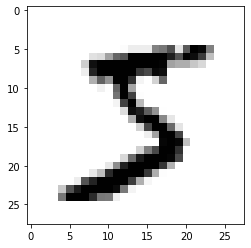

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap="binary")
plt.show()